<a href="https://colab.research.google.com/github/majorquev/Introduccion_a_ciencia_de_datos_R/blob/master/Clases/Clase5/Copia_de_Clase5_1_reglas_de_asociacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 4: Reglas de asociación


**Autor:** Miguel Jorquera Viguera<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Bastián Aballay Leiva<br>
**E-mail ayudante:** bastian.aballayleiva@gmail.com

Las reglas de asociación nos permiten identificar relaciones entre variables a través de grandes datasets. Es posible cuantificar que tan "fuerte" es la relación obtenida mediante diversas métricas de interés, entre las cuales se destacan el _lift_, _support_ y _confidence_ de una regla.

Para más detalles sobre la definición y algoritmo de generación de las reglas refiérase a la presentación de la clase 7 de este curso.




In [ ]:
install.packages("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(arules)
library(dplyr)
data(Groceries)
class(Groceries)

inspect(head(Groceries, 6))

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write



Attaching package: ‘dplyr’


The following objects are masked from ‘package:arules’:

    intersect, recode, setdiff, setequal, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] "transactions"
attr(,"package")
[1] "arules"

    items                     
[1] {citrus fruit,            
     semi-finished bread,     
     margarine,               
     ready soups}             
[2] {tropical fruit,          
     yogurt,                  
     coffee}                  
[3] {whole milk}              
[4] {pip fruit,               
     yogurt,                  
     cream cheese ,           
     meat spreads}            
[5] {other vegetables,        
     whole milk,              
     condensed milk,          
     long life bakery product}
[6] {whole milk,              
     butter,                  
     yogurt,                  
     rice,                    
     abrasive cleaner}        


In [ ]:
Groceries

transactions in sparse format with
 9835 transactions (rows) and
 169 items (columns)

In [ ]:
?transactions

In [ ]:
 # Numero de items por observación mediante comndo size
size(head(Groceries,6))

[1] 4 3 1 4 4 5

In [ ]:
 #LIST convierte las trasacciones a una lista (con mayusculas)
lista <- LIST(head(Groceries,6))

In [ ]:
lista
class(lista)
str(lista)

[[1]]
[1] "citrus fruit"        "semi-finished bread" "margarine"          
[4] "ready soups"        

[[2]]
[1] "tropical fruit" "yogurt"         "coffee"        

[[3]]
[1] "whole milk"

[[4]]
[1] "pip fruit"     "yogurt"        "cream cheese " "meat spreads" 

[[5]]
[1] "other vegetables"         "whole milk"              
[3] "condensed milk"           "long life bakery product"

[[6]]
[1] "whole milk"       "butter"           "yogurt"           "rice"            
[5] "abrasive cleaner"

[1] "list"

List of 6
 $ : chr [1:4] "citrus fruit" "semi-finished bread" "margarine" "ready soups"
 $ : chr [1:3] "tropical fruit" "yogurt" "coffee"
 $ : chr "whole milk"
 $ : chr [1:4] "pip fruit" "yogurt" "cream cheese " "meat spreads"
 $ : chr [1:4] "other vegetables" "whole milk" "condensed milk" "long life bakery product"
 $ : chr [1:5] "whole milk" "butter" "yogurt" "rice" ...


In [ ]:
class(Groceries)

[1] "transactions"
attr(,"package")
[1] "arules"

In [ ]:
# eclat genera todos lo  ITEMSETS con un suport mínimo.
frequentItems <- eclat(Groceries, 
                        parameter = list(supp = 0.02)
                       ) # se calcula el support para items frecuentes

Eclat

parameter specification:
 tidLists support minlen maxlen            target  ext
    FALSE    0.02      1     10 frequent itemsets TRUE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 196 

create itemset ... 
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [59 item(s)] done [0.00s].
creating sparse bit matrix ... [59 row(s), 9835 column(s)] done [0.00s].
writing  ... [122 set(s)] done [0.01s].
Creating S4 object  ... done [0.00s].


In [ ]:
inspect(frequentItems)

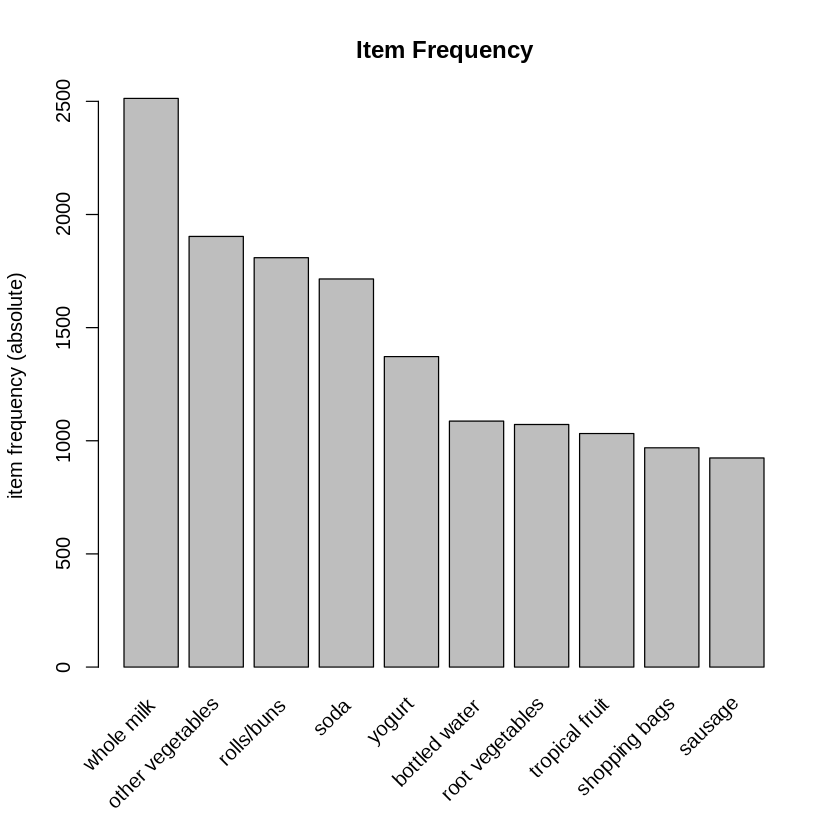

In [ ]:
itemFrequencyPlot(Groceries,
                  topN=10, 
                  type="absolute", 
                  main="Item Frequency") #podemos graficar los items frecuentes

## ¿Cómo determinamos las reglas?

In [ ]:
rules <- apriori(data = Groceries, #debe ser del tipo "transactions"
                 parameter = list(supp=0.01, conf = 0.08),
                )
rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.08    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 98 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [88 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [472 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 472 rules 

In [ ]:
length(rules)
inspect(rules)

In [ ]:
## Y si queremos buscar con qué combinar un producto determinado, por ejemplo leche
rules <- apriori( data = Groceries, 
                  parameter =list (supp=0.002,conf = 0.05, minlen = 2),
                  appearance = list(default="rhs", lhs ="whole milk"),
                  control = list (verbose=T)) 

class(rules)
rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.05    0.1    1 none FALSE            TRUE       5   0.002      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 19 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [147 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [36 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


[1] "rules"
attr(,"package")
[1] "arules"

set of 36 rules 

In [ ]:
inspect(rules)

     lhs             rhs                        support    confidence coverage
[1]  {whole milk} => {hamburger meat}           0.01474326 0.05769996 0.255516
[2]  {whole milk} => {hygiene articles}         0.01281139 0.05013928 0.255516
[3]  {whole milk} => {sugar}                    0.01504830 0.05889375 0.255516
[4]  {whole milk} => {long life bakery product} 0.01352313 0.05292479 0.255516
[5]  {whole milk} => {dessert}                  0.01372649 0.05372065 0.255516
[6]  {whole milk} => {cream cheese }            0.01647178 0.06446478 0.255516
[7]  {whole milk} => {chicken}                  0.01759024 0.06884202 0.255516
[8]  {whole milk} => {white bread}              0.01708185 0.06685237 0.255516
[9]  {whole milk} => {chocolate}                0.01667514 0.06526064 0.255516
[10] {whole milk} => {coffee}                   0.01870869 0.07321926 0.255516
[11] {whole milk} => {frozen vegetables}        0.02043721 0.07998408 0.255516
[12] {whole milk} => {beef}                     0.02

In [ ]:
rules_conf <- sort(rules, 
                   by="lift",
                   decreasing=TRUE) # ordenando por confidence rules.

In [ ]:
rules
inspect(rules_conf)

set of 6 rules 

    lhs                   rhs                support    confidence coverage 
[1] {yogurt}           => {whole milk}       0.05602440 0.4016035  0.1395018
[2] {whole milk}       => {yogurt}           0.05602440 0.2192598  0.2555160
[3] {other vegetables} => {whole milk}       0.07483477 0.3867578  0.1934926
[4] {whole milk}       => {other vegetables} 0.07483477 0.2928770  0.2555160
[5] {rolls/buns}       => {whole milk}       0.05663447 0.3079049  0.1839349
[6] {whole milk}       => {rolls/buns}       0.05663447 0.2216474  0.2555160
    lift     count
[1] 1.571735 551  
[2] 1.571735 551  
[3] 1.513634 736  
[4] 1.513634 736  
[5] 1.205032 557  
[6] 1.205032 557  


## Transaformación a objetos de clase trasaction





In [ ]:
## example 1: creating transactions form a list
a_list <- list(
      c("a","b","c"),
      c("a","b"),
      c("a","b","d"),
      c("c","e"),
      c("a","b","d","e")
      )

## set transaction names
names(a_list) <- paste("Tr",c(1:5), sep = "")
a_list

## coerce into transactions
trans1 <- as(a_list, "transactions")

## analyze transactions
summary(trans1)
image(trans1)

## example 2: creating transactions from a matrix
a_matrix <- matrix(c(
  1,1,1,0,0,
	1,1,0,0,0,
	1,1,0,1,0,
	0,0,1,0,1,
	1,1,0,1,1
  ), ncol = 5)

## set dim names
dimnames(a_matrix) <- list(c("a","b","c","d","e"),
	paste("Tr",c(1:5), sep = ""))

a_matrix

## coerce
trans2 <- as(a_matrix, "transactions")
trans2
inspect(trans2)

## example 3: creating transactions from data.frame
a_df <- data.frame(
	age   = as.factor(c(6, 8, NA, 9, 16)), 
	grade = as.factor(c("A", "C", "F", NA, "C")),
  pass  = c(TRUE, TRUE, FALSE, TRUE, TRUE))  
## note: factors are translated differently to logicals and NAs are ignored
a_df

## coerce
trans3 <- as(a_df, "transactions") 
inspect(trans3)
as(trans3, "data.frame")

## example 4: creating transactions from a data.frame with 
## transaction IDs and items (by converting it into a list of transactions first) 
a_df3 <- data.frame(
  TID = c(1,1,2,2,2,3), 
  item=c("a","b","a","b","c", "b")
  )
a_df3
trans4 <- as(split(a_df3[,"item"], a_df3[,"TID"]), "transactions")
trans4
inspect(trans4)

## Note: This is very slow for large datasets. It is much faster to 
## read transactions using read.transactions() with format = "single".
## This can be done using an anonymous file.
write.table(a_df3, file = tmp <- file(), row.names = FALSE)
trans4 <- read.transactions(tmp, format = "single",
  header = TRUE, cols = c("TID", "item"))
close(tmp)
inspect(trans4)

## example 5: create transactions from a dataset with numeric variables
## using discretization.
data(iris)

irisDisc <- discretizeDF(iris)
head(irisDisc)
trans5 <- as(irisDisc, "transactions")
trans5
inspect(head(trans5))